In [44]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [45]:
# Load the dataset
file_path = '/content/Email_Marketing_Campaign_Dataset_Rounded.csv'
df = pd.read_csv(file_path)

In [46]:
df

,Customer_Age,Emails_Opened,Emails_Clicked,Purchase_History,Time_Spent_On_Website,Days_Since_Last_Open,Customer_Engagement_Score,Opened_Previous_Emails,Clicked_Previous_Emails,Device_Type
0,39,7,1,546.1,3.3,23,53.3,0,1,1
1,33,6,1,1069.8,4.9,23,60.5,1,0,1
2,41,5,1,1293.2,5.0,3,55.9,0,0,1
3,50,3,1,2443.8,5.9,25,61.8,0,1,0
4,32,6,0,1778.3,2.3,40,66.8,0,0,1
...,...,...,...,...,...,...,...,...,...,...
995,32,7,2,1514.2,4.9,32,65.5,0,1,0
996,52,4,2,461.1,6.4,47,81.5,0,1,1
997,41,3,0,1339.9,11.2,11,62.1,0,0,0
998,29,4,2,2321.7,6.6,37,69.9,0,1,1


In [47]:
# Display basic information
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_Age               1000 non-null   int64  
 1   Emails_Opened              1000 non-null   int64  
 2   Emails_Clicked             1000 non-null   int64  
 3   Purchase_History           1000 non-null   float64
 4   Time_Spent_On_Website      1000 non-null   float64
 5   Days_Since_Last_Open       1000 non-null   int64  
 6   Customer_Engagement_Score  1000 non-null   float64
 7   Opened_Previous_Emails     1000 non-null   int64  
 8   Clicked_Previous_Emails    1000 non-null   int64  
 9   Device_Type                1000 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 78.2 KB
None


In [48]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   Customer_Age  Emails_Opened  Emails_Clicked  Purchase_History  \
0            39              7               1             546.1   
1            33              6               1            1069.8   
2            41              5               1            1293.2   
3            50              3               1            2443.8   
4            32              6               0            1778.3   

   Time_Spent_On_Website  Days_Since_Last_Open  Customer_Engagement_Score  \
0                    3.3                    23                       53.3   
1                    4.9                    23                       60.5   
2                    5.0                     3                       55.9   
3                    5.9                    25                       61.8   
4                    2.3                    40                       66.8   

   Opened_Previous_Emails  Clicked_Previous_Emails  Device_Type  
0                       0     

In [49]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Customer_Age                 0
Emails_Opened                0
Emails_Clicked               0
Purchase_History             0
Time_Spent_On_Website        0
Days_Since_Last_Open         0
Customer_Engagement_Score    0
Opened_Previous_Emails       0
Clicked_Previous_Emails      0
Device_Type                  0
dtype: int64


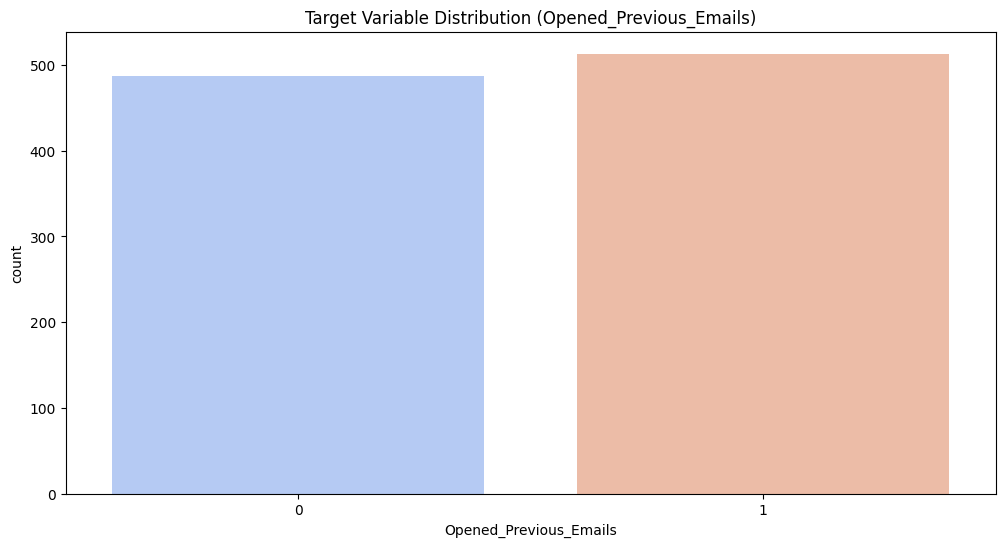

In [50]:
# EDA - Visualizing data distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Opened_Previous_Emails', palette='coolwarm')
plt.title("Target Variable Distribution (Opened_Previous_Emails)")
plt.show()

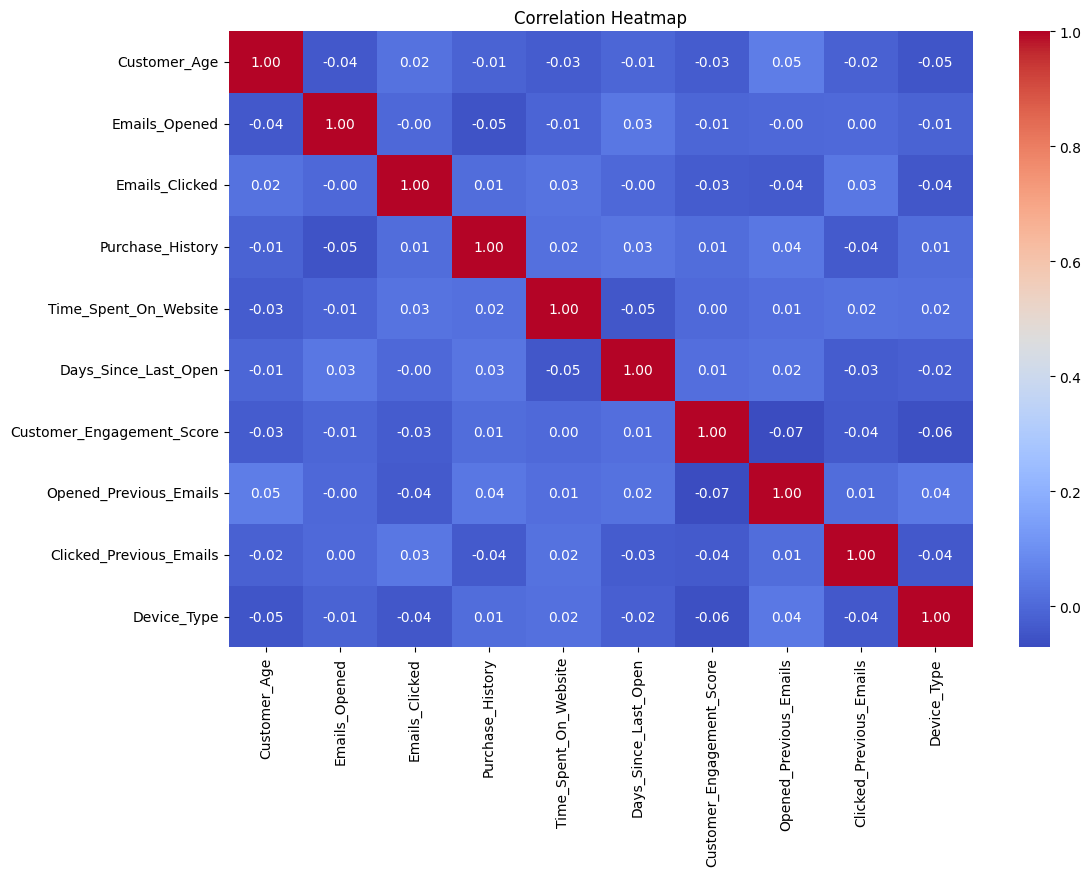

In [51]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [52]:
# Feature-target split
X = df.drop(columns=['Opened_Previous_Emails'])  # Dropping target variable
y = df['Opened_Previous_Emails']

In [53]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Model training using Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
# Predictions
y_pred = model.predict(X_test)

In [57]:
# Model evaluation
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.5266666666666666

Confusion Matrix:
[[71 85]
 [57 87]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.46      0.50       156
           1       0.51      0.60      0.55       144

    accuracy                           0.53       300
   macro avg       0.53      0.53      0.53       300
weighted avg       0.53      0.53      0.52       300



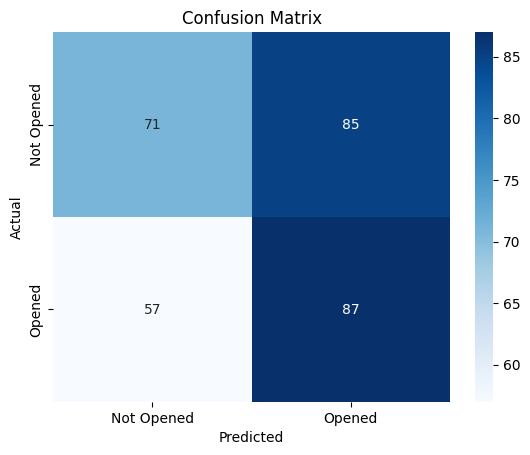

In [58]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Opened', 'Opened'], yticklabels=['Not Opened', 'Opened'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()